### Introduction

This notebook demonstrates the effect of churn and virality on one's playerbase. It also serves as a tutorial on python programming, plotting, and model fitting.

Exercises:

Easy: In the "plotting multiple values" part, try using [np.linspace()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) or [np.arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) instead of manually defining all the individual values.

Harder: Solve the model fitting problem at the end using pen and paper algebraic manipulation

Harder: Solve the model fitting problem at the end using SymPy (see <https://docs.sympy.org/latest/modules/solvers/solvers.html#module-sympy.solvers.recurr>). If you don't have SymPy installed, go to the terminal or command line and typ ```pip install sympy```


Let's first import basic math and visualization tools. This is similar to C++ "include" or C# "using"

In [5]:
import numpy as np
import matplotlib.pyplot as pp

Now let's run and plot a simple simulation of a model of how one's player base might evolve

Text(0, 0.5, 'Players')

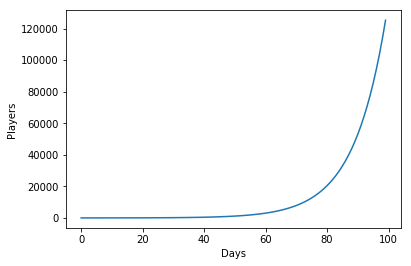

In [2]:
#Parameters
players=10
simulatedDays=100
churnProbability=0.0
viralityProbability=0.1

#Empty Python list, simulation data will be added to this
data=[]

#Simulate.
#New to python? loops are declared with ":". 
#All intended code belongs to the loop. 
#The loop variable, here "i" iterates over the given values.
#The range(X) behaves like a list with numbers: [0,1,2...X-1]
for i in range(simulatedDays):
    #store this day's player count for plotting
    data.append(players)
    #some players churn, some really like the game and recruit new players
    players=players - players*churnProbability + players*viralityProbability
    
#plot
pp.plot(data)
pp.xlabel("Days")
pp.ylabel("Players")

Now, let's implement a slightly modified model, where only those players who did not churn share on social media and recruit new players.

You should see that now, the number of players declines even when churnProbability=viralityProbability

Text(0, 0.5, 'Players')

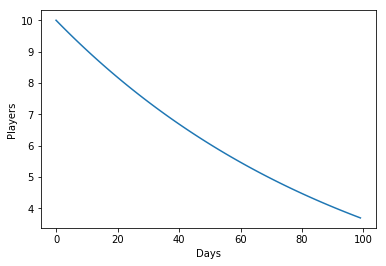

In [3]:
#Parameters
players=10
simulatedDays=100
churnProbability=0.1
viralityProbability=0.1

#Empty Python list, simulation data will be added to this
data=[]

#Simulate.
for i in range(simulatedDays):
    #store this day's player count for plotting
    data.append(players)
    #some players churn
    players=players - players*churnProbability
    #of those who did not churn, some recruit new players
    players=players + players*viralityProbability
    
#plot
pp.plot(data)
pp.xlabel("Days")
pp.ylabel("Players")

### Adjusting model parameters

Above, we have a so-called "forward model dynamics model", i.e., a way of computing a next value based on some previous value(s) and parameter(s).  

In many cases, one needs to figure out what the parameters should be based on some goals or data. Below, we demonstrate three possible ways.

#### Plotting using multiple parameter values
First, it may be useful to include multiple plots in the same graph. PyPlot provides easy tools for this. This also allows us to see how nested loops work in Python

Text(0, 0.5, 'Players')

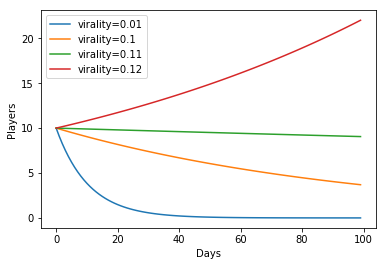

In [4]:
#Parameters
simulatedDays=100
churnProbability=0.1


#First, we loop over a list of values we want to inspect
for viralityProbability in [0.01,0.1,0.11,0.12]:
    #The data list must be cleared before each plot. 
    #This is why we now have it inside the loop
    data=[]
    #We also need to reset the player count before each simulation
    players=10
    for i in range(simulatedDays):
        #store this day's player count for plotting
        data.append(players)
        #some players churn
        players=players - players*churnProbability
        #of those who did not churn, some recruit new players
        players=players + players*viralityProbability
    #Simulation done with the current viralityProbabity.
    #Plot the results. We need to provide the label parameter for the legend() command below to work.
    #The label value uses python string formatting, where the "{}" are replaced by the value(s) provided
    #for the format() method.
    pp.plot(data,label="virality={}".format(viralityProbability))

#The legend command adds the curve legend
pp.legend()

#Add plot labels
pp.xlabel("Days")
pp.ylabel("Players")


#### Exploring parameters using sliders etc.

Jupyter notebooks support interactivity through the ```ipywidgets``` package. A good tutorial can be found [here](https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6). 

If you get an error from the ```import ipywidgets```, you probably have the package missing. To solve the issue, go to terminal or command line and type ```pip install ipywidgets```


In [10]:
#import the tools
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

#Parameters
simulatedDays=100
churnProbability=0.1

@interact
def simulate(viralityProbability=0.1):
    #Initialize simulation
    data=[]
    players=10
    #Simulate
    for i in range(simulatedDays):
        #store this day's player count for plotting
        data.append(players)
        #some players churn
        players=players - players*churnProbability
        #of those who did not churn, some recruit new players
        players=players + players*viralityProbability

    #plot
    pp.plot(data)
    pp.xlabel("Days")
    pp.ylabel("Players")
    

interactive(children=(FloatSlider(value=0.1, description='viralityProbability', max=0.30000000000000004, min=-…

#### Numerical optimization of parameters

There are various numerical optimization methods that one can use. For real-valued (decimal number) parameters, a good default choice is [Covariance Matrix Adaptation Evolution Strategy (CMA-ES)](https://en.wikipedia.org/wiki/CMA-ES). 

CMA-ES is loosely inspired by natural evolution, and randomly samples a population of "individuals" or parameter combinations from a Gaussian (normal) distribution. Over a number of iterations or "generations", the population distribution then evolves to minimize some objective function value that the user computes for each individual.

This figure illustrates the process in a problem with two variables, with the optimum shown in white.

![](https://upload.wikimedia.org/wikipedia/commons/d/d8/Concept_of_directional_optimization_in_CMA-ES_algorithm.png)


In [20]:
#Import the tools. If you get an error, go to command line and type "pip install cma"
import cma

#To use CMA-ES, you need to first define some options.
#The most important one is population size. 
#A small population is fast to compute, but less reliable. 
#With problems of just a few variables, something like 16 tends to work.
cmaes_options = {'popsize': 16}

#Finally, one needs to define an initial mean and standard deviation ("sigma") for the population
#The rule of thumb is that:
#1) the mean should be an initial guess of the solution
#2) the sigma should be approximately at least the square of the distance to the solution

#Let's guess that 0.1 might be close to optimal. We define a vector of two numbers, because
#CMA-ES has a limitation that it needs at least two variables to optimize. However, we 
#can simply ignore the second one
initialMean=[0.1,0.0]      #guessing that 0.1 might be close to 0.1.

#Let's guess that the solution is no further than 0.1 from the initial guess.
sigma=0.1

#Create the optimizer (an instance of the CMAEvolutionStrategy class)
optimizer=cma.CMAEvolutionStrategy(initialMean,sigma,inopts=cmaes_options)

#Run for 100 generations
for generation in range(100):
    #Ask CMA-ES for the current population
    population=optimizer.ask()

    #A list for the objective function values for each individual in the population
    fvals=[]
    
    #Loop over all individuals in the population
    for x in population:
        #extract the variable we are interested in
        viralityProbability=x[0]
        
        #Initialize simulation
        players=10
        data=[]
        
        #Simulate
        for i in range(simulatedDays):
            #store this day's player count for plotting
            data.append(players)
            #some players churn
            players=players - players*churnProbability
            #of those who did not churn, some recruit new players
            players=players + players*viralityProbability
        
        #Compute the fitness. Here, we use the squared difference between 
        #the final player count produced by the simulation and some target player count.
        #This objective has the minimum value 0 when the simulation results match the target
        targetPlayerCount=10 #let's try to keep the player count constant
        
        #Indexing lists with "-1" gives the last element. 
        objectiveFunctionValue=(targetPlayerCount-data[-1])**2

        #Add the objective function value to the list
        fvals.append(objectiveFunctionValue)
    #We now have the objective function values for the whole population.
    #All we have to do now is to feed them back to CMA-ES
    optimizer.tell(population,fvals)
    
    #Print the optimization stats.
    #Note: we use the modulo trick (x % n is the modulus of x/n) to only print every 10 iterations
    #Exercise: Why the xbest[0]? (xbest gives the best optimized parameter combination)
    if generation % 10 == 0:
        print("Generation {}, best viralityProbability {}, objective function value {}".format(generation,optimizer.result.xbest[0],optimizer.result.fbest))
    


(8_w,16)-aCMA-ES (mu_w=4.8,w_1=32%) in dimension 2 (seed=1086242, Tue Dec 10 10:07:59 2019)
Generation 0, best viralityProbability 0.11175490635967483, objective function value 0.34835594903995426
Generation 10, best viralityProbability 0.11119477270020886, objective function value 0.005597758462871167
Generation 20, best viralityProbability 0.11111117032844059, objective function value 2.7839107815522093e-09
Generation 30, best viralityProbability 0.11111111046754117, objective function value 3.2881144106760637e-13
Generation 40, best viralityProbability 0.11111111105459615, objective function value 2.5356113725548467e-15
Generation 50, best viralityProbability 0.1111111111111277, objective function value 2.1821740466197576e-22
Generation 60, best viralityProbability 0.1111111111111119, objective function value 4.9482404685255275e-25
Generation 70, best viralityProbability 0.11111111111111119, objective function value 0.0
Generation 80, best viralityProbability 0.11111111111111119, ob